# Exploratory Data Analysis

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Dataset

The dataset used is taken from Open Power System Data, a free-of-charge platform with data regarding renewable generation capacity of Germany, in time series format and weather data that persisted during that time duration. It can be found in:

https://open-power-system-data.org/

The dataset is about the renewable energy generation is for a year from 1st January 2016 to 1st January 2017 and another dataset that has the climatic information during the same period of time:
* Time series has wind and solar production capacity in hourly interval. 
* Weather data with wind speed, radiation, temperature and other measurements in a CSV file.

## 1.1. Renewable energy production data

### Read the data

First, the csv file contains data from alot of regions in europe so we need to extract our related data by filtering out needed columns which is fetch those columns containing the timestamp (columns with 'utc') and the columns containing German data (columns with 'DE').

In [2]:
production = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                        parse_dates=[0], index_col=0)

In [3]:
production

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,...,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0
2015-01-01 01:00:00+00:00,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,...,13267.0,12858.0,NaN,3974.0,466.0,3508.0,5087.0,4562.0,NaN,7.0
2015-01-01 02:00:00+00:00,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,...,12702.0,12611.0,NaN,4194.0,470.0,3724.0,4906.0,4517.0,NaN,8.0
2015-01-01 03:00:00+00:00,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,...,12452.0,12490.0,NaN,4446.0,473.0,3973.0,4865.0,4601.0,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00+00:00,57559.0,56708.0,NaN,0.0,NaN,NaN,10654.0,NaN,NaN,4754.0,...,17719.0,17190.0,0.0,8186.0,4628.0,3558.0,7657.0,7428.0,NaN,164.0
2020-09-30 20:00:00+00:00,54108.0,53270.0,NaN,0.0,NaN,NaN,11836.0,NaN,NaN,5194.0,...,16984.0,16446.0,0.0,8879.0,5056.0,3824.0,7072.0,6870.0,NaN,242.0
2020-09-30 21:00:00+00:00,49845.0,49239.0,NaN,0.0,NaN,NaN,12168.0,NaN,NaN,5339.0,...,15549.0,15256.0,0.0,8972.0,5165.0,3807.0,6465.0,6388.0,NaN,257.0


The data file contains information between 2014 and 2020. We will only be interested in the data for 2016.

In [4]:
production = production.loc[production.index.year == 2016, :]

In [5]:
production

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,40126.0,38163.0,38631.0,0.0,0.0,32812.0,8579.0,0.2614,2162.0,2285.0,...,13311.0,13038.0,0.0,5615.0,2262.0,3352.0,4652.0,3892.0,0.0,25.0
2016-01-01 01:00:00+00:00,38429.0,36769.0,38631.0,0.0,0.0,32812.0,8542.0,0.2603,2162.0,2229.0,...,12598.0,12245.0,0.0,5497.0,2218.0,3279.0,4431.0,3705.0,0.0,24.0
2016-01-01 02:00:00+00:00,37484.0,36452.0,38631.0,0.0,0.0,32812.0,8443.0,0.2573,2162.0,2011.0,...,12056.0,11980.0,0.0,5439.0,2005.0,3434.0,4325.0,3678.0,0.0,17.0
2016-01-01 03:00:00+00:00,37150.0,36578.0,38631.0,0.0,0.0,32812.0,8295.0,0.2528,2162.0,1943.0,...,11886.0,11784.0,0.0,5451.0,1930.0,3521.0,4337.0,3803.0,0.0,20.0
2016-01-01 04:00:00+00:00,36388.0,37173.0,38631.0,0.0,0.0,32812.0,7319.0,0.2231,2162.0,1582.0,...,11825.0,11734.0,0.0,4904.0,1580.0,3324.0,4197.0,3809.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,49558.0,45915.0,40085.0,0.0,0.0,37145.0,15303.0,0.4120,2587.0,3310.0,...,16301.0,16148.0,0.0,9253.0,2979.0,6275.0,6131.0,5451.0,0.0,25.0
2016-12-31 20:00:00+00:00,47558.0,44496.0,40085.0,0.0,0.0,37145.0,15354.0,0.4134,2587.0,3304.0,...,15667.0,15458.0,0.0,9152.0,2972.0,6180.0,5973.0,5415.0,0.0,32.0
2016-12-31 21:00:00+00:00,47600.0,44702.0,40085.0,0.0,0.0,37145.0,14847.0,0.3997,2587.0,3306.0,...,15838.0,15506.0,0.0,8741.0,2975.0,5766.0,6208.0,5574.0,0.0,38.0


In [6]:
production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DE_load_actual_entsoe_transparency               8784 non-null   float64
 1   DE_load_forecast_entsoe_transparency             8784 non-null   float64
 2   DE_solar_capacity                                8784 non-null   float64
 3   DE_solar_generation_actual                       8712 non-null   float64
 4   DE_solar_profile                                 8712 non-null   float64
 5   DE_wind_capacity                                 8784 non-null   float64
 6   DE_wind_generation_actual                        8710 non-null   float64
 7   DE_wind_profile                                  8710 non-null   float64
 8   DE_wind_offshore_capacity                        8784 non-nu

There 8784 entries, which correspond to the number of hours in a leap year like 2016.

### Exploratory Data Analysis

We are plotting the wind and solar generation capacity against time to get a better idea of the properties of the dataset.

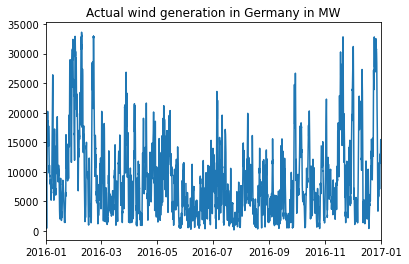

In [7]:
# create plot
plt.plot(production.index, production['DE_wind_generation_actual'])
plt.title('Actual wind generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

# save plot
plt.savefig("figs/wind.png", dpi=200)

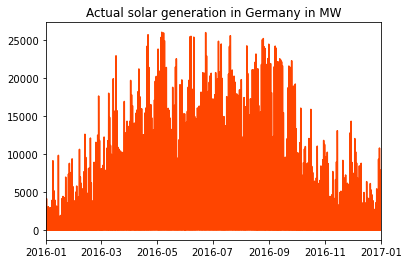

In [8]:
# create plot
plt.plot(production.index, production['DE_solar_generation_actual'], c='OrangeRed')
plt.title('Actual solar generation in Germany in MW')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

# save plot
plt.savefig("figs/solar.png", dpi=200)

In [9]:
production_wind_solar = production[['DE_wind_generation_actual', 'DE_solar_generation_actual']]

## 1.2. Weather data

### Read the data

Next, we read the weather data for Germany in 2016 by reading the full csv file.

The data in the file contains the following:

* wind
    - v1: velocity [m/s] @ height h1 (2 meters above displacement height)
    - v2: velocity [m/s] @ height h2 (10 meters above displacement height)
    - v_50m: velocity [m/s] @ 50 meters above ground
    - h1: height above ground [m] (h1 = displacement height +2m)
    - h2: height above ground [m] (h2 = displacement height +10m)
    - z0: roughness length [m]
* solar parameters:
    - SWTDN: total top-of-the-atmosphere horizontal radiation [W/m²]
    - SWGDN: total ground horizontal radiation [W/m²]
* temperature data
    - T: Temperature [K] @ 2 meters above displacement height (see h1)
* air data
    - Rho: air density [kg/m³] @ surface
    - p: air pressure [Pa] @ surface

In [10]:
weather = pd.read_csv("data/weather_data_GER_2016.csv",
                     parse_dates=[0], index_col=0)

In [11]:
weather

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 01:00:00+00:00,1,47.5,5.625,0.77,1.61,2.63,2,10,0.052510,0.0,0.0,277.025665,1.239390,99300.164062
2016-01-01 02:00:00+00:00,2,47.5,5.625,0.66,1.22,1.89,2,10,0.052495,0.0,0.0,277.223755,1.243861,99310.992188
2016-01-01 03:00:00+00:00,3,47.5,5.625,0.96,1.35,1.62,2,10,0.052480,0.0,0.0,277.133240,1.247390,99314.773438
2016-01-01 04:00:00+00:00,4,47.5,5.625,1.14,1.56,1.83,2,10,0.052480,0.0,0.0,276.867767,1.248869,99324.796875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,8779,55.0,15.000,10.45,12.60,14.26,2,10,0.001006,0.0,0.0,278.549011,1.272779,101755.281250
2016-12-31 20:00:00+00:00,8780,55.0,15.000,10.52,12.69,14.39,2,10,0.001021,0.0,0.0,278.574341,1.271909,101698.242188
2016-12-31 21:00:00+00:00,8781,55.0,15.000,10.49,12.65,14.38,2,10,0.001014,0.0,0.0,278.634644,1.270996,101653.398438


In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248704 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cumulated hours  int64  
 1   lat              float64
 2   lon              float64
 3   v1               float64
 4   v2               float64
 5   v_50m            float64
 6   h1               int64  
 7   h2               int64  
 8   z0               float64
 9   SWTDN            float64
 10  SWGDN            float64
 11  T                float64
 12  rho              float64
 13  p                float64
dtypes: float64(11), int64(3)
memory usage: 257.3 MB


Note that the data is given by chuncks of the German geographical territory from 256 different weather station centers so as the renewable energy data is extracted from the overall country we will combine the reading from 256 different stations into single record per hourly timestamp.

In [13]:
weather.loc[weather.index == '2016-01-01 00:00:00', :]

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0,47.5,5.625,0.81,1.88,3.36,2,10,0.052526,0.0,0.0,277.350159,1.236413,99282.710938
2016-01-01 00:00:00+00:00,0,47.5,6.250,0.85,1.77,3.69,2,10,0.163823,0.0,0.0,277.609924,1.226037,98194.710938
2016-01-01 00:00:00+00:00,0,47.5,6.875,0.94,1.94,3.79,3,11,0.286626,0.0,0.0,276.850159,1.205101,96186.710938
2016-01-01 00:00:00+00:00,0,47.5,7.500,0.84,1.68,2.82,2,10,0.109472,0.0,0.0,276.414612,1.200341,95874.710938
2016-01-01 00:00:00+00:00,0,47.5,8.125,0.74,1.56,2.51,2,10,0.066503,0.0,0.0,276.039612,1.202233,96050.710938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01 00:00:00+00:00,0,55.0,12.500,3.71,4.36,5.06,2,10,0.006501,0.0,0.0,277.781799,1.280602,102218.710938
2016-01-01 00:00:00+00:00,0,55.0,13.125,3.82,4.34,4.69,2,10,0.002311,0.0,0.0,277.668518,1.283288,102282.710938
2016-01-01 00:00:00+00:00,0,55.0,13.750,3.75,4.23,4.61,2,10,0.003382,0.0,0.0,276.957581,1.287438,102290.710938


Therefore, for any given hour, we have data for 256 'chuncks' of Germany. Dividing the total number of entries by the number of 'chuncks' returns the expected number of hours of a leap year.

In [14]:
2248704/256

8784.0

Averaging over all the 'chuncks':

In [15]:
weather_by_day = weather.groupby(weather.index).mean()

In [16]:
weather_by_day

,cumulated hours,lat,lon,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
timestamp,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.0,51.25,10.3125,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,1.0,51.25,10.3125,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,2.0,51.25,10.3125,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,3.0,51.25,10.3125,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,4.0,51.25,10.3125,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,8779.0,51.25,10.3125,3.684609,5.233516,7.098086,2.550781,10.550781,0.164608,0.0,0.0,272.140240,1.268835,99528.062500
2016-12-31 20:00:00+00:00,8780.0,51.25,10.3125,3.762305,5.307539,7.083867,2.550781,10.550781,0.164577,0.0,0.0,271.980562,1.269241,99470.789062
2016-12-31 21:00:00+00:00,8781.0,51.25,10.3125,3.792852,5.340195,7.122773,2.546875,10.546875,0.164536,0.0,0.0,271.809519,1.269414,99416.492188


### Exploratory Data Analysis

Plotting weather-related quantities during 2016 to get a better idea of the properties of the dataset.

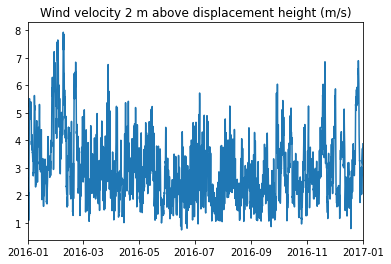

In [17]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['v1'])
plt.title('Wind velocity 2 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

# save plot
plt.savefig("figs/v1.png", dpi=200)

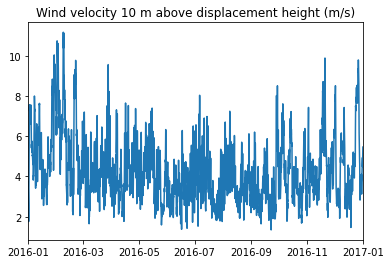

In [18]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['v2'])
plt.title('Wind velocity 10 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

# save plot
plt.savefig("figs/v2.png", dpi=200)

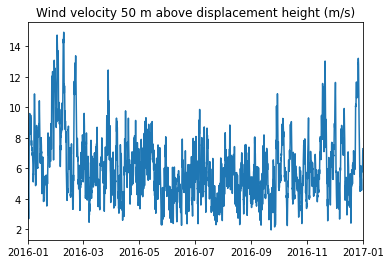

In [19]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['v_50m'])
plt.title('Wind velocity 50 m above displacement height (m/s)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

plt.savefig("figs/v_50m.png", dpi=200)

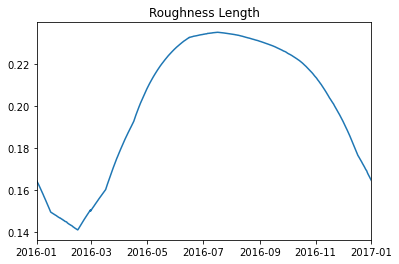

In [20]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['z0'])
plt.title('Roughness Length')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

plt.savefig("figs/z0.png", dpi=200)

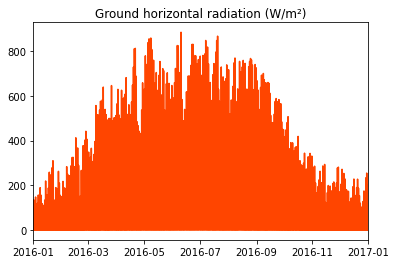

In [21]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['SWGDN'], c='OrangeRed')
plt.title('Ground horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

# save plot
plt.savefig("figs/radiation.png", dpi=200)

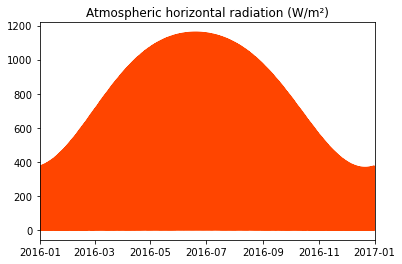

In [22]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['SWTDN'], c='OrangeRed')
plt.title('Atmospheric horizontal radiation (W/m²)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

# save plot
plt.savefig("figs/atomspheric-radiation.png", dpi=200)

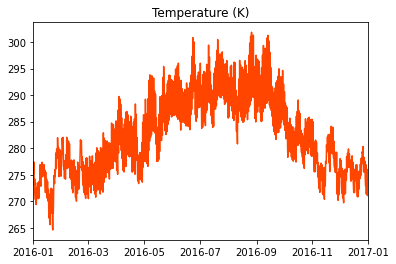

In [23]:
# create plot
plt.plot(weather_by_day.index, weather_by_day['T'], c='OrangeRed')
plt.title('Temperature (K)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

# save plot
plt.savefig("figs/temperature_K.png", dpi=200)

# 1.3 Weather Forecast Data

### Read the data

Next, we read the historical weather forecast data for Germany in 2016 that is obtained from visualcrossing.com, Visual Crossing is a FORECAST & HISTORICAL WEATHER DATA gathering organization that provides a single source for worldwide weather data, weather APIs, and geospatial mapping for businesses and professionals. This is a paid service and they charge 0.0001$ each record.

So in my case I extracted hourly records for a year from 1st January, 2016 to 1st January, 2017. Which is 8784 records and I was charged 0.8784$ = 0.74euros.

The data in the file contains the following:
* wind
    - windspeed: 2 minute average of wind speed
    - winddir: 2 minute average of wind direction
    - pressure: Sea level Pressure
* solar
    - visibility: Distance that can be viewed
    - cloudcover: Percentage of sky that is covered by cloud
    - uvindex: UV Index maps the maximum UV level forecast under either clear or cloudy sky.
* general
    - temp: Land Surface Temperature calculated (usually 1.5 meters above land)
    - humidity: Humidity calculated usually at the same height.
    - dew: Dew Point Temperature
    - precip: Amount of liquid equivalent precipitation (rain, snow etc.)
    - weather condition: string column with the below 3 unique values converted to one hot encoding
        - Clear: If that hour had a clear sky.
        - Overcast: If that hour had an overcast.
        - Partially cloudy: If that hour was partially cloudy.

In [24]:
weather_forecast_data = pd.read_csv('data/weather_data_filtered_2016.csv', parse_dates=[0])

In [25]:
weather_forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   utc_datetime  8856 non-null   datetime64[ns, UTC]
 1   de_datetime   8856 non-null   object             
 2   temp          8856 non-null   float64            
 3   humidity      8856 non-null   float64            
 4   dew           8856 non-null   float64            
 5   windspeed     8856 non-null   float64            
 6   winddir       8856 non-null   float64            
 7   pressure      216 non-null    float64            
 8   visibility    8856 non-null   float64            
 9   cloudcover    8856 non-null   float64            
 10  conditions    8856 non-null   object             
 11  skyType       8856 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(8), int64(1), object(2)
memory usage: 830.4+ KB


## 2. Merge DataFrames

As suggested by the above plots from both datasets (and by common sense), there seems to be some correlation between the wind and solar generation and some of the measured weather quantities. 

First, let's merge the two DataFrames into a single DataFrame. But few records were dropped after merge as during my execution I noticed that few records of generation capacity were not included due to which they had to be removed as otherwise prediction variable y will be N/A which no algorithm will accept.

In [26]:
# merge production_wind_solar and weather_by_day DataFrames
thesis_dataset = pd.merge(production_wind_solar, weather_by_day, how='left', left_index=True, right_index=True)
thesis_dataset = thesis_dataset.dropna(subset=['DE_wind_generation_actual','DE_solar_generation_actual'])
thesis_dataset = thesis_dataset.drop(['cumulated hours', 'lat', 'lon'], axis=1)

In [27]:
thesis_dataset

,DE_wind_generation_actual,DE_solar_generation_actual,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,T,rho,p
utc_timestamp,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,8579.0,0.0,2.616758,3.714414,5.132500,2.546875,10.546875,0.164370,0.0,0.0,275.296747,1.253185,99281.007812
2016-01-01 01:00:00+00:00,8542.0,0.0,2.564375,3.631055,4.976094,2.546875,10.546875,0.164331,0.0,0.0,275.255473,1.253778,99288.492188
2016-01-01 02:00:00+00:00,8443.0,0.0,2.480859,3.516328,4.794688,2.546875,10.546875,0.164288,0.0,0.0,275.217089,1.254304,99296.398438
2016-01-01 03:00:00+00:00,8295.0,0.0,2.397148,3.404961,4.664023,2.546875,10.546875,0.164239,0.0,0.0,275.211715,1.254562,99306.695312
2016-01-01 04:00:00+00:00,7319.0,0.0,2.305703,3.286602,4.566289,2.546875,10.546875,0.164199,0.0,0.0,275.193369,1.254733,99319.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,15303.0,0.0,3.684609,5.233516,7.098086,2.550781,10.550781,0.164608,0.0,0.0,272.140240,1.268835,99528.062500
2016-12-31 20:00:00+00:00,15354.0,0.0,3.762305,5.307539,7.083867,2.550781,10.550781,0.164577,0.0,0.0,271.980562,1.269241,99470.789062
2016-12-31 21:00:00+00:00,14847.0,0.0,3.792852,5.340195,7.122773,2.546875,10.546875,0.164536,0.0,0.0,271.809519,1.269414,99416.492188


Further evidence for the apparent correlation between certain quantities can be obtained from the following plots, in which the wind and solar generation is shown as a function of the several weather quantities.

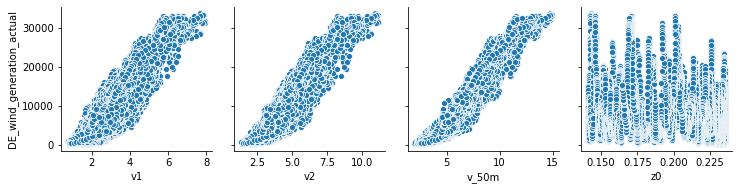

In [28]:
sns.pairplot(thesis_dataset, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_wind_generation_actual'])

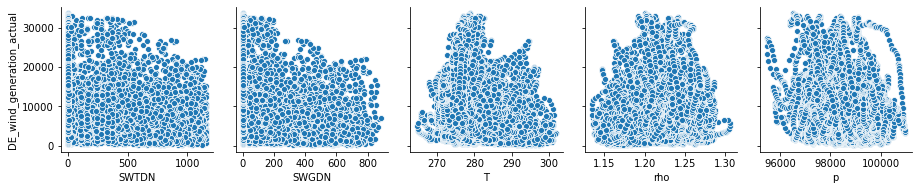

In [29]:
sns.pairplot(thesis_dataset, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_wind_generation_actual'])

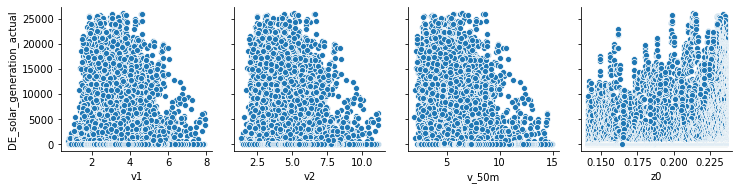

In [30]:
sns.pairplot(thesis_dataset, x_vars=['v1', 'v2', 'v_50m', 'z0'], y_vars=['DE_solar_generation_actual'])

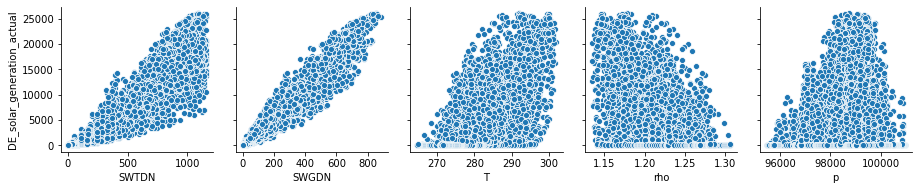

In [31]:
sns.pairplot(thesis_dataset, x_vars=['SWTDN', 'SWGDN', 'T', 'rho', 'p'], y_vars=['DE_solar_generation_actual'])

There seems to be a linear relation between the wind generation and the wind velocities v1, v2 and v_50m, but not the other quantities.

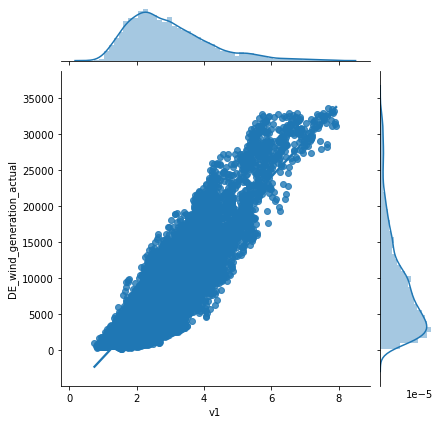

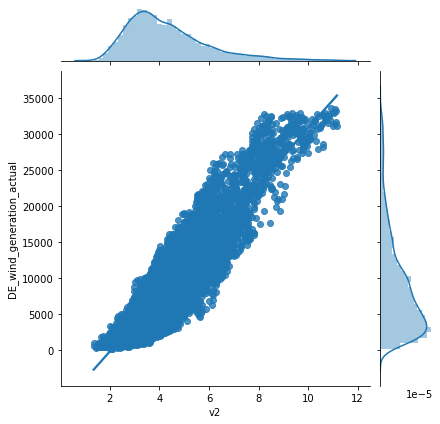

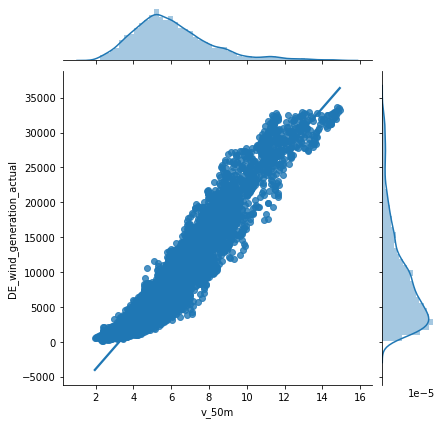

In [32]:
sns.jointplot(x='v1', y='DE_wind_generation_actual', data=thesis_dataset, kind='reg')
sns.jointplot(x='v2', y='DE_wind_generation_actual', data=thesis_dataset, kind='reg')
sns.jointplot(x='v_50m', y='DE_wind_generation_actual', data=thesis_dataset, kind='reg')

Similarly, there seems to be a linear relation between the solar generation and the top-of-the-atmosphere and ground radiation.

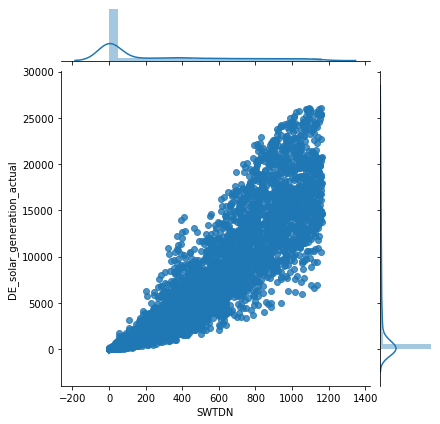

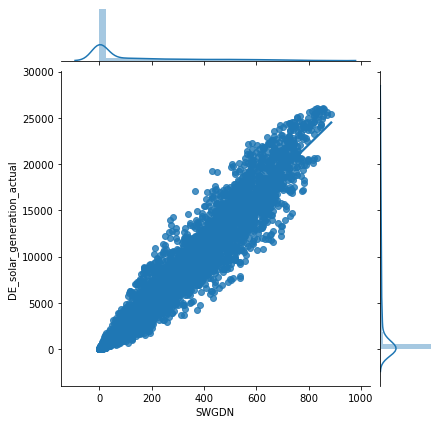

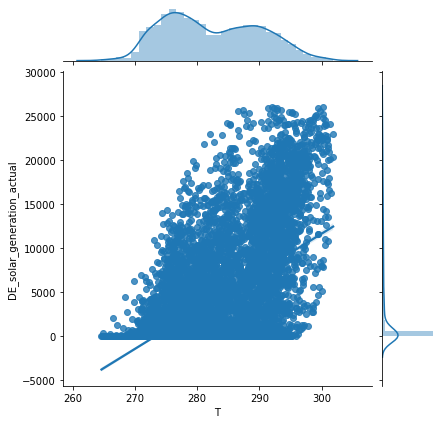

In [33]:
sns.jointplot(x='SWTDN', y='DE_solar_generation_actual', data=thesis_dataset, kind='reg')
sns.jointplot(x='SWGDN', y='DE_solar_generation_actual', data=thesis_dataset, kind='reg')
sns.jointplot(x='T', y='DE_solar_generation_actual', data=thesis_dataset, kind='reg')

In [34]:
thesis_dataset[['v1', 'v2', 'v_50m', 'z0', 'SWTDN', 'SWGDN', 'T', 'DE_wind_generation_actual', 'DE_solar_generation_actual']].describe()

,v1,v2,v_50m,z0,SWTDN,SWGDN,T,DE_wind_generation_actual,DE_solar_generation_actual
count,8710.000000,8710.000000,8710.000000,8710.000000,8710.000000,8710.000000,8710.000000,8710.000000,8710.000000
mean,2.942022,4.293778,6.050977,0.200226,278.161445,146.149373,282.367904,8717.957979,3946.116073
std,1.197014,1.613602,2.090126,0.032327,359.492630,212.568632,7.600473,6848.673246,6041.485045
min,0.746523,1.345508,1.958984,0.140880,0.000000,0.000000,264.596945,135.000000,0.000000
25%,2.068818,3.137695,4.625986,0.170408,0.000000,0.000000,276.034470,3586.500000,0.000000
50%,2.714980,3.942969,5.710977,0.211835,31.686710,7.899137,281.238663,6903.000000,123.500000
75%,3.574941,5.102090,7.084453,0.230068,523.566528,243.067932,288.708031,11704.250000,6287.750000
max,7.927695,11.164297,14.922969,0.235163,1160.939453,885.725586,301.845276,33626.000000,26055.000000


## 3. Linear regression algorithm

Given the observations above, I’m going to try a linear regression algorithm in order to predict the wind and solar generation from some of the above weather quantities.

In [35]:
# import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# instantiate LinearRegression
lr = LinearRegression()

## 3.1. Wind generation

To predict the wind generation, we construct the features matrix `X_wind` with the features v1, v2 and v_50m, and the target `Y_wind` with actual wind generation.

In [36]:
X_wind = thesis_dataset[['v1', 'v2', 'v_50m', 'z0']]
y_wind = thesis_dataset['DE_wind_generation_actual']

Then, we implement a 5-fold CV procedure.

In [37]:
scores_wind = cross_val_score(lr, X_wind, y_wind, cv=5)
print(scores_wind, "\naverage =", np.mean(scores_wind))

[0.84708392 0.88861781 0.81771924 0.88321327 0.8573129 ] 
average = 0.858789427526081


The first line contains the five values of $R^2$ for each of the 5 folds in the cross validation procedure, whereas the second line is their average. We see that our linear model has an $R^2$ of approximately 0.86, which is quite good for such a simple model! We can make good predictions about the wind generation in Germany in 2016 given only the wind velocities at different heights.

## 3.2. Solar generation

To predict the solar generation, we follow a very similar procedure. We again construct the features matrix `X_solar`, but now with the features SWTDN, SWGDN and T, and the target `Y_solar` with actual solar generation.

In [38]:
X_solar = thesis_dataset[['SWTDN', 'SWGDN', 'T']]
y_solar = thesis_dataset['DE_solar_generation_actual']

Then, we implement a 5-fold CV procedure:

In [39]:
scores_solar = cross_val_score(lr, X_solar, y_solar, cv=5)
print(scores_solar, "\naverage =", np.mean(scores_solar))

[0.88997699 0.95302251 0.95591745 0.95045437 0.87382238] 
average = 0.9246387377264398


We get an even better value of $R^2$! We can make good predictions about the solar generation in Germany in 2016 given only the temperature and top-of-the-atmosphere and ground radiation.

# 3.3 Solar and Wind Combined

Just trying to predict if there weather variables combined could give better accuracy for predicting the overall renewable energy where X is all the weather variables deemed useful for renewable prediction.

In [40]:
X = thesis_dataset[['v1', 'v2', 'v_50m', 'z0', 'SWTDN', 'SWGDN', 'T']]
y = thesis_dataset['DE_solar_generation_actual'] + thesis_dataset['DE_wind_generation_actual']

In [41]:
scores_overall = cross_val_score(lr, X, y, cv=5)
print(scores_solar, "\naverage =", np.mean(scores_overall))

[0.88997699 0.95302251 0.95591745 0.95045437 0.87382238] 
average = 0.8703756669231486


We get an average score for $R^2$! that is less than $\frac{92(Solar) + 86(Wind)}{2} = 89$. So it could signified that global model couldn't be created by considering all the variables for predicting solar and wind. But instead a ensemble or stacked model that incorporates different results could give much better score.

# 4. Combining with the Forecast Data

In [42]:
thesis_dataset.reset_index(inplace=True)
thesis_dataset = pd.merge(thesis_dataset, weather_forecast_data, left_on='utc_timestamp', right_on='utc_datetime', how='left').set_index('utc_timestamp')
thesis_dataset.drop(['utc_datetime', 'de_datetime'], axis = 1, inplace=True)

In [43]:
thesis_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8711 entries, 2016-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DE_wind_generation_actual   8711 non-null   float64
 1   DE_solar_generation_actual  8711 non-null   float64
 2   v1                          8711 non-null   float64
 3   v2                          8711 non-null   float64
 4   v_50m                       8711 non-null   float64
 5   h1                          8711 non-null   float64
 6   h2                          8711 non-null   float64
 7   z0                          8711 non-null   float64
 8   SWTDN                       8711 non-null   float64
 9   SWGDN                       8711 non-null   float64
 10  T                           8711 non-null   float64
 11  rho                         8711 non-null   float64
 12  p                           8711 non-null 

In [44]:
thesis_dataset.describe()

,DE_wind_generation_actual,DE_solar_generation_actual,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,...,p,temp,humidity,dew,windspeed,winddir,pressure,visibility,cloudcover,skyType
count,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,...,8711.000000,8710.000000,8710.000000,8710.000000,8710.000000,8710.000000,216.000000,8710.000000,8710.000000,8710.000000
mean,8717.896568,3945.663070,2.941975,4.293732,6.050961,2.692196,10.692196,0.200228,278.129513,146.132596,...,98545.987261,10.633800,72.806055,5.211917,12.533410,189.472044,1009.766667,9.257245,45.320804,1.043513
std,6848.282483,6041.286172,1.196953,1.613515,2.090007,0.131461,0.131461,0.032325,359.484347,212.562197,...,857.036615,8.392887,19.060688,6.115717,7.193215,94.345533,9.379919,1.970650,42.020461,0.951005
min,135.000000,0.000000,0.746523,1.345508,1.958984,2.457031,10.457031,0.140880,0.000000,0.000000,...,95467.640625,-11.100000,13.530000,-14.900000,0.000000,0.000000,998.600000,0.000000,0.000000,0.000000
25%,3587.000000,0.000000,2.068887,3.137734,4.626191,2.582031,10.582031,0.170419,0.000000,0.000000,...,98079.667969,4.000000,60.342500,0.900000,7.500000,105.000000,1004.300000,10.000000,0.000000,0.000000
50%,6904.000000,123.000000,2.714648,3.942500,5.711445,2.722656,10.722656,0.211839,31.675276,7.862777,...,98590.250000,9.700000,76.335000,5.100000,11.400000,209.000000,1004.400000,10.000000,46.700000,1.000000
75%,11703.500000,6287.500000,3.574883,5.102070,7.084414,2.812500,10.812500,0.230067,523.363525,243.060669,...,99099.808594,17.400000,87.890000,10.000000,16.400000,269.000000,1021.500000,10.000000,88.900000,2.000000
max,33626.000000,26055.000000,7.927695,11.164297,14.922969,2.832031,10.832031,0.235163,1160.939453,885.725586,...,100956.546875,34.900000,100.000000,20.000000,60.700000,360.000000,1022.900000,10.000000,100.000000,2.000000


(735964.0, 736330.0)

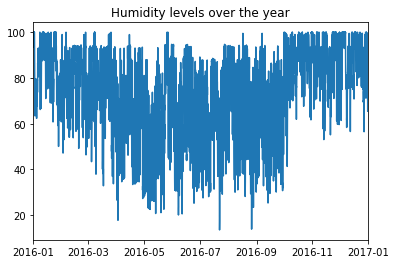

In [45]:
# create plot
plt.plot(thesis_dataset.index, thesis_dataset['humidity'])
plt.title('Humidity levels over the year')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

(735964.0, 736330.0)

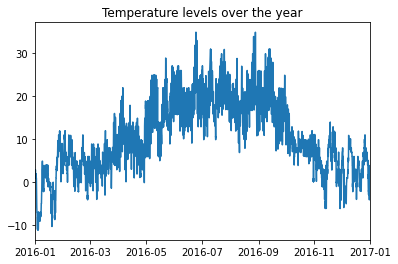

In [46]:
# create plot
plt.plot(thesis_dataset.index, thesis_dataset['temp'])
plt.title('Temperature levels over the year')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

(735964.0, 736330.0)

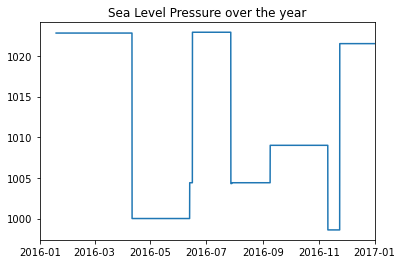

In [47]:
# create plot
plt.plot(thesis_dataset.index, thesis_dataset['pressure'].ffill())
plt.title('Sea Level Pressure over the year')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

(735964.0, 736330.0)

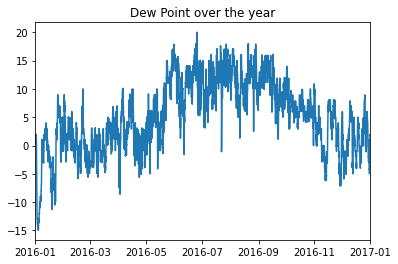

In [48]:
# create plot
plt.plot(thesis_dataset.index, thesis_dataset['dew'])
plt.title('Dew Point over the year')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-01-01'))

In [49]:
thesis_dataset['total_renewable_generation'] = thesis_dataset['DE_wind_generation_actual'] + thesis_dataset['DE_solar_generation_actual']
thesis_dataset.to_csv('data/final_thesis_dataset.csv')